In [1]:
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import extract
import Neural_net_2 as nn
import numpy as np
from sklearn import model_selection as modsel

In [2]:
coord_xyz, ene, forces = extract.load_data("/Users/walfits/Documents/aspirin/", n_samples=10000)
mean_ene = np.mean(ene)
std_ene = np.std(ene)

ene = (ene-mean_ene)/std_ene
forces = forces/std_ene
ene_force = np.concatenate((np.reshape(ene, (len(ene), 1)), forces), axis=1)

In [3]:
X_train, X_test, y_train, y_test = modsel.train_test_split(coord_xyz, ene_force, test_size=0.2)

In [4]:
estimator = nn.MLPRegFlow()

In [8]:
estimator.load_NN("Models/model_01")

INFO:tensorflow:Restoring parameters from Models/model_01/
INFO:tensorflow:Restoring parameters from Models/model_01/


In [9]:
ene_forces_pred = estimator.predict(X_test)

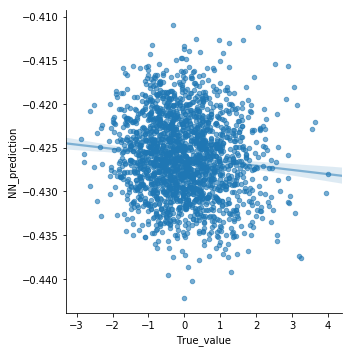

In [10]:
estimator.correlation_plot(ene_forces_pred[:, 0], y_test[:, 0])

In [14]:
estimator.score_new(X_train, y_train)

-0.058301991253987925